In [41]:
%%html
<style>
div.TOC {    
    background-color: #fcfcfc;
    border-color: #dFdFdF;
    border-left: 5px solid #dFdFdF;
    padding: 0.5em;
    }
div.TOC a {
  color: grey;
  text-decoration: none;
  font-weight: 500;
}
.ToTOC a {
    color:#AAAAAA;
    font-size:18px;
    text-decoration: none;
}
 </style>

# Solving ODE's numerically with scipy toolkit <a name="TableOfContents"></a> 

### Table of contents
<div class="TOC">
<ol>
    <li>[An example using the exponential decay equation](#introduction)</li>
    <ul style="list-style-type:none;margin-top:0">
        <li>[Exploring the effect of parameters](#parameters)</li>
        <li>[Applications](#applciations1)</li>
        <ul style="list-style-type:none;margin-top:0">
            <li>[1.1 First Order Linear ODEs](#FOLODE)</li>
            <li>[1.2 Beyond Smooth Equations](#Nonsmooth)</li>
            <li>[1.3 Exploring First Order Quadratic Equations](#FOQODE)</li>
        </ul>
    </ul>
    <li>[Systems of differential equations](#systemsofdiffeqs)</li>
    <ul style="list-style-type:none;margin-top:0">
        <li>[](#parameters)</li>
        <li>[Applications](#applciations1)</li>
        <ul style="list-style-type:none;margin-top:0">
            <li>[2.1 Coupled Linear Systems](#CLS)</li>
            <li>[2.2 Coupled Non-smooth Systems](#CNSS)</li>
            <li>[2.3 The Pendulum Equation (Second Order Differential Equations) ](#Pend)</li>
        </ul>
    </ul>
</ol>
</div>

## 1. An example using the exponential decay equation <a name="introduction"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

We are going to use the scipy library to solve ODE's and systems of ODE's. The scipy library uses a powerful suite of ODE solves and estimators to tackle linear, nonlinear, smooth and non-smooth ODE's weather or not a closed form solution exists. To work with ODE's in Python we need to import three libraries: 

* `numpy` gives us tools to deal with matrices
* `matplotlib` give us some functions to produce mathematical plots. This libraries syntax is modeled on MATLAB's plotting syntax
* `odeint` from the library `scipy.integrate` is our ODE solver. In general, `scipy` has a ton of great scientific computing functionality that is worth exploring on your own time.

We closely follow the exposition here: https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

We will start by using scipy to solve the differential equation

\begin{align}\label{diffeq1}
\frac{dy}{dt} = -ky(t),
\end{align}

for $k=0.3$ using numerical methods.

To use `odeint` to solve this equation, we write right hand side as a function of $t$ and $y$ that we will call `model`:

\begin{align}
\frac{dy}{dt} = \mathtt{model(y,t,k)},
\end{align}

The first step is to define the function `model` that takes `y`, `t` and `k` as inputs and returns $\frac{dy}{dt}$:

In [43]:
## Defining out model

def model(y,t,k):
    dydt = -k*y
    return dydt

In [44]:
model(1,2,3)  # Try running this line of code for different input values of y, t and k

-3

Next, we set our constants and our initial value for $y(0) = y_0$:

In [45]:
## Setting the constants

k = 0.3   # The growth/decay constant
y0 = 5.   # The initial value of y

Finally, we define the domain of `t` by creating an array of time values spaced evenly apart. The function `linspace(t0,t1)` returns a list of 50 numbers spaced evenly between `t0` and `t1`. The number of points returned can be optionally chosen by specifying the varabile `num` when calling the function. For example, `linspace(t0,t1,num=30)` returns an array of 30 evenly spaced points starting with `t0` and ending with `t1`.

Note: If you look at the [help page](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html) for `np.linspace`, you'll find the notation `linspace(t0,t1,num=50,...)`. In python documentation, `num=50` means that if the `num` variable is not specified the function automatically sets `num` to 50. Since `t0` and `t1` are not assigned default values they *must* be assigned by the user. 

In [46]:
## Defining the domain of t

t = np.linspace(0,20)
print(t)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


We will now actually solve the differential equation. 

The scipy [ODE solver integrate](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html) `odeint(func,y0,t)` takes a function, an initial value, and a vector of time points as inputs. It then outputs a numerical solution to the differential equation

`dy/dt = func(y, t0, ...)`

We also need to specify the other parameters in our function, in this case the constant $k$. This is done by setting `args=(k1,k2,k3,...,)` where $k_i$ are the parameters of the differential equation. The trailing `,` here specifies `(k1,k2,k3,...,)` as a *tuple*, or unchangeable, ordered list. The model function should have all of its inputs specified except `y` and `t0`. 

As we can see in the output, the function `odeint` returns a column vector with one $y$ value for each $t$ value in `t`. 

In [47]:
## Solving the diffeq dy/dt = model(y,t) for initial y value y0

y_sol = odeint(model,y0,t, args=(k,))
print(y_sol)

[[5.        ]
 [4.42375528]
 [3.91392204]
 [3.46284668]
 [3.06375722]
 [2.7106624 ]
 [2.3982614 ]
 [2.12186437]
 [1.87732164]
 [1.6609623 ]
 [1.46953813]
 [1.30017539]
 [1.15033154]
 [1.01775702]
 [0.90046157]
 [0.79668431]
 [0.70486726]
 [0.62363203]
 [0.55175909]
 [0.48816942]
 [0.4319084 ]
 [0.3821314 ]
 [0.33809115]
 [0.29912649]
 [0.26465247]
 [0.23415155]
 [0.20716582]
 [0.18329018]
 [0.16216617]
 [0.14347669]
 [0.12694116]
 [0.11231132]
 [0.09936756]
 [0.08791555]
 [0.07778338]
 [0.06881893]
 [0.06088762]
 [0.05387038]
 [0.04766188]
 [0.0421689 ]
 [0.03730898]
 [0.03300916]
 [0.02920489]
 [0.02583905]
 [0.02286113]
 [0.02022641]
 [0.01789534]
 [0.01583292]
 [0.01400819]
 [0.01239376]]



Note: You can find out the dimension of a vector by getting its `.shape` property. Try adding `print(sol.shape)` to the cell below.

Note: You can click to the left of the output cell to minimize it. 

Lets visualize the solution to this differential equation using `matplotlib`. The command `plt.plot(t,y_sol)` will display a plot with $t$ on the horizontal axis and our predicted $y$ on the vertical axis.

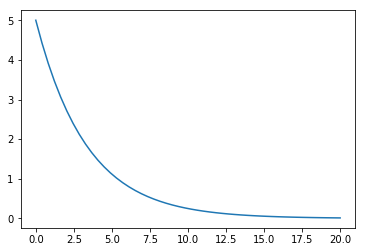

In [48]:
## Plotting the resulting solution

plt.plot(t,y_sol)

## Exploring the effect of parameters <a name="parameters"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Lets compare the solutions for $k = .3$, $k=.7$ and $k=1.1$. Numerically solving the decay equation for different $k$ values using `odeint` is as simple as rerunning the code we wrote above using different parameters but the same model.

In [49]:
k1 = .3
k2 = .7
k3 = 1.1

y1 = odeint(model,y0,t,args=(k1,))
y2 = odeint(model,y0,t,args=(k2,))
y3 = odeint(model,y0,t,args=(k3,))

To plot them all on the same axis just requires the execution of several plot commands in the same cell.

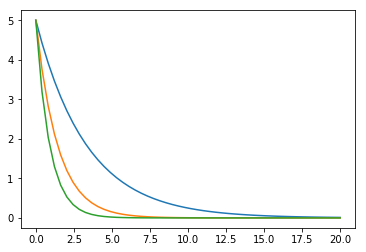

In [50]:
plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y3)

The `plt.plot` function has a lot of options. For example, for each line we can specify the axis labels, the line width, style and color, and the inclusion of a legend. 

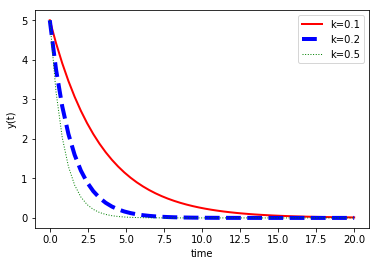

In [52]:
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=4,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=1,label='k=0.5')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

For the rest of the lab, make sure to label the axis on your plots and add a legend if there are multiple lines.

## Applications: <a name="applciations1"></a>

### 1.1 First Order Linear ODEs <a name="FOLODE"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Use `odeint` to solve

$$
\frac{dy}{dt} = -y(t) + k\,,\hspace{5em} y(0) = 0\,,
$$

for $t\in [0,5]$. Plot the results for $k = 1,2,3$. You will need to define a new model function `dydt = model2(y,t,k)`, and specify the domain of `t`. It is worth giving the new model function a name like `model2` to make it distinct from the exponential decay model. 

In [53]:
def model2(y,t,k):
    dydt = -y + k
    return dydt

y0 = 0
k = 1
t = np.linspace(0,5)

z = odeint(model2, y0, t, args=(k,))

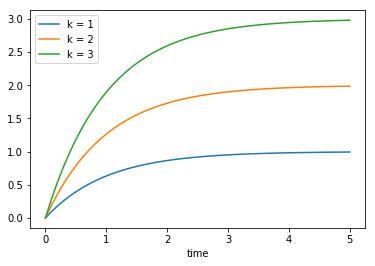

In [54]:
for k in [1,2,3]:
    z = odeint(model2, y0, t, args=(k,))
    lab = 'k = '+str(k)
    plt.plot(t,z, label=lab)
    
plt.xlabel('time')
plt.legend()

### 1.2 Beyond Smooth Equations <a name="Nonsmooth"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Many interesting physical systems *do not* smoothly relate their values with their derivatives. While this may be is difficult to deal with analytically, it is much easier numerically. Let $u(t)$ be the step function

$$
u(t) = \begin{cases}
0& \text{for }t<10
\\
2& \text{for }t\geq 10
\end{cases}\,.
$$

Solve the differential equation 

$$
5\frac{dy}{dt} = -y(t) + u(t)\,,\hspace{5em} y(0) = 1\,,
$$

for $t\in [0,20]$ and plot the result. What happens when you change the coefficient of $\frac{dy}{dt}$?

Hint: You will need to use an if/else statement in your definition of the function. The syntax is

```
if SOME_TEST :
    DO_THIS
    THEN_THIS
    ...
else:
    DO_THIS_OTHER_THING
    AND_THIS
    ...
```

In this case, `SOME_TEST` is any logical statement that can evaluate to true or false, like `t == 4`, `y>7` or `y<t`.

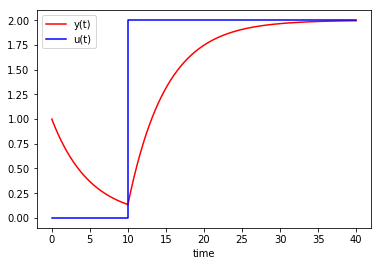

In [55]:
def model3(y,t):
    if t<10:
        dydt = -y/(5.0)
    else:
        dydt = (-y+2)/(5.0)
    
    return dydt

        
y0 = 1
t = np.linspace(0,40,1000)

y_sol = odeint(model3,y0,t)

plt.plot(t,y_sol,'r-', label='y(t)')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='u(t)')

plt.xlabel('time')
plt.legend()


### 1.3 Exploring First Order Quadratic Equations <a name="FOQODE"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Consider the family of differential equations given by 

$$
\frac{dy}{dt} = -ay^2 + byt + ct^2\,,
$$

for positive constants $a$, $b$ and $c$. Solve this equation numerically for $y(0) = 1$ and $a = -b = c = 1$. How does the solution change as we change $a$, $b$ and $c$?

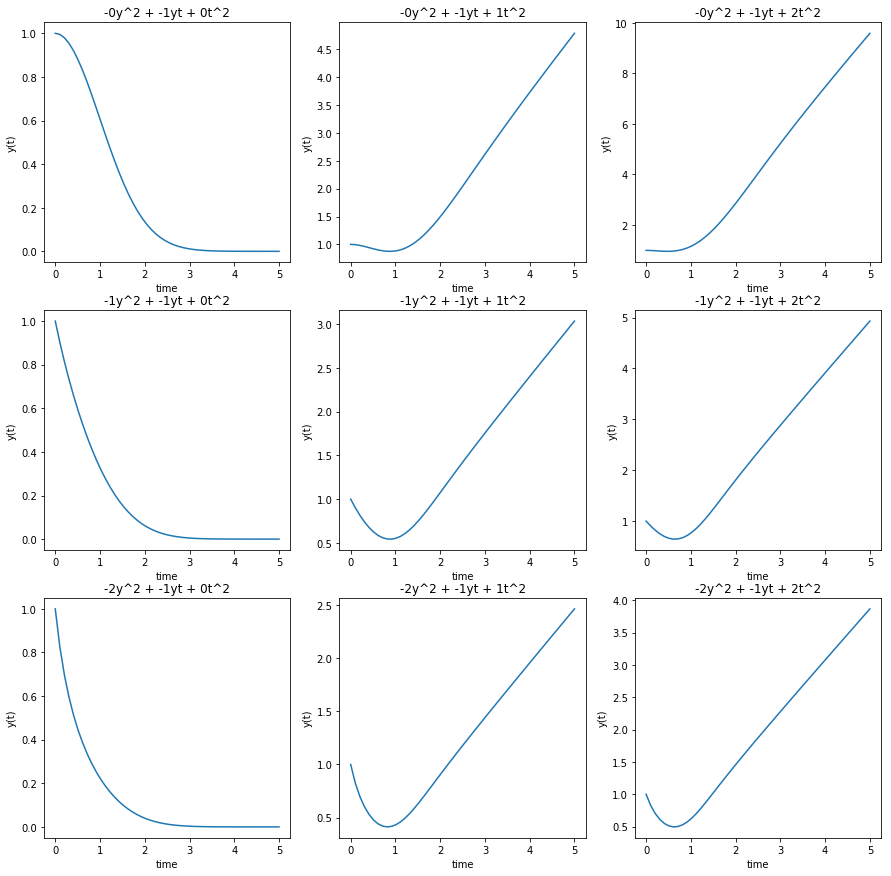

In [56]:
def modelf(y,t,a,b,c):
    dydt = -a*y*y + b*t*y + c*t*t
    return dydt

y0 = 1
t = np.linspace(0,5)

b = -1

fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

i = 0

for a in [0,1,2]:
    for c in [0,1,2]:
        z = odeint(modelf, y0, t, args=(a,b,c,))
        axs[i].plot(t,z)
        axs[i].set_title('-'+str(a)+'y^2 + '+str(b)+'yt + '+str(c)+'t^2')
        axs[i].set_xlabel('time')
        axs[i].set_ylabel('y(t)')
        i = i + 1

## 2. Systems of differential equations <a name="systemsofdiffeqs"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

The `odeint` solver can also handle coupled systems of differential equations, the model function just needs to output a *vector* $\left[\frac{dx}{dt},\frac{dy}{dt}\right]$ instead of a single *value* like $\frac{dy}{dt}$. For example, consider the coupled equations

\begin{align}
\frac{dx}{dt} &= y(t)\,,\hspace{4em} &x(0)&=0\,,
\\
\frac{dy}{dt} &= -x(t)\,, &y(0)&=1\,.
\end{align}

We can solve this system of equations using `odeint` by promoting `y` to a vector `Y = [x,y]`, and making our function `model(Y,t)` a function of `Y` that returns a vector `dYdt = [dxdt,dydt]`.

In [57]:
def modelV(Y,t):
    x,y = Y
    dYdt = [y,-x]
    return dYdt

Take a second and run this function on different inputs.

In [58]:
print(modelV([1,2],0))

[2, -1]


Now, to fit we just set the starting values for `x` and `y` by specifying `Y0 = [0,1]` and run the estimator.

In [59]:
Y0 = [0,1]
t = np.linspace(0,10,100)

sol = odeint(modelV,Y0,t)

print(sol)

[[ 0.          1.        ]
 [ 0.10083841  0.99490282]
 [ 0.20064884  0.97966323]
 [ 0.29841379  0.95443659]
 [ 0.3931366   0.91948007]
 [ 0.48385162  0.87515003]
 [ 0.56963409  0.8218984 ]
 [ 0.64960949  0.76026804]
 [ 0.72296254  0.69088722]
 [ 0.78894544  0.61446325]
 [ 0.84688554  0.5317752 ]
 [ 0.89619218  0.44366605]
 [ 0.9363627   0.351034  ]
 [ 0.9669876   0.25482339]
 [ 0.98775467  0.15601501]
 [ 0.99845221  0.05561616]
 [ 0.99897116 -0.04534966]
 [ 0.98930623 -0.14585317]
 [ 0.96955595 -0.2448698 ]
 [ 0.93992166 -0.34139014]
 [ 0.90070547 -0.43443022]
 [ 0.85230715 -0.52304156]
 [ 0.7952201  -0.60632082]
 [ 0.73002629 -0.68341902]
 [ 0.65739032 -0.7535502 ]
 [ 0.57805268 -0.81599941]
 [ 0.49282214 -0.87013003]
 [ 0.4025676  -0.91539023]
 [ 0.30820913 -0.95131861]
 [ 0.21070867 -0.97754889]
 [ 0.11106016 -0.99381367]
 [ 0.01027947 -0.99994715]
 [-0.09060602 -0.99588681]
 [-0.19056784 -0.98167402]
 [-0.28858693 -0.95745369]
 [-0.38366407 -0.92347272]
 [-0.47483    -0.88007753]
 

The first column of `sol` is the list of `x` values associated to each `t` value and the second column is the list of `y` values. We can plot these on the graph

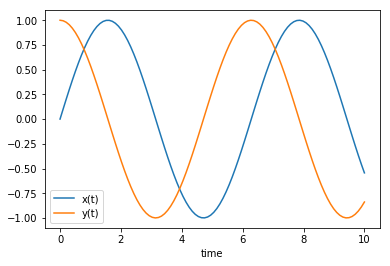

In [61]:
## 
plt.plot(t,sol[:,0], label='x(t)')
plt.plot(t,sol[:,1], label='y(t)')

plt.xlabel('time')
plt.legend()

*or* think about them as tracing out a path $(x(t), y(t)) \in \mathbb{R}^2$ by plotting them against each other. 

Text(0,0.5,'y(t)')

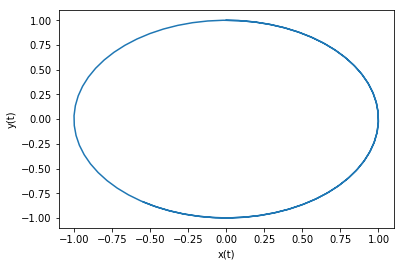

In [63]:
plt.plot(sol[:,0],sol[:,1])

plt.xlabel('x(t)')
plt.ylabel('y(t)')

## Applications: <a name="apps2"></a>

### 2.1 Coupled Linear Systems <a name="CLS"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Use a model with vector input `Y` and output `[dxdt,dydt]` to solve the initial value problem 

\begin{align}
\frac{dx}{dt} &= x(t) + 5y(t)\,,\hspace{4em} &x(0)&=1\,,
\\
\frac{dy}{dt} &= -2x(t)\,, &y(0)&=0\,,
\end{align}

for $t\in [0,10]$.

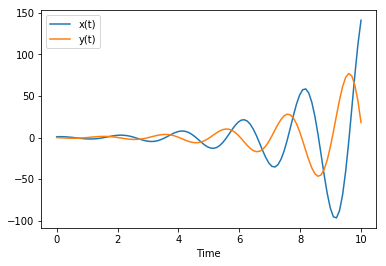

In [64]:
def model5(Y,t):
    x,y = Y
    dYdt = [x+5*y,-2*x]
    return dYdt

Y0 = [1,0]
t = np.linspace(0,10,100)

sol = odeint(model5,Y0,t)

plt.plot(t,sol[:,0],label='x(t)')
plt.plot(t,sol[:,1],label='y(t)')

plt.xlabel('Time')
plt.legend()

Text(0.5,1,'x(t) vs y(t)')

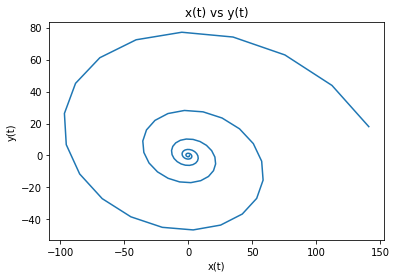

In [65]:
plt.plot(sol[:,0],sol[:,1])

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('x(t) vs y(t)')

### 2.2 Coupled Non-smooth Systems <a name="CNSS"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

As before, let $u(t)$ be the step function $u(t) = \begin{cases}0& \text{for }t<10
\\
2& \text{for }t\geq 10
\end{cases}\,.
$ Solve the initial value problem 

\begin{align}
\frac{dx}{dt} &= -x(t) + u(t)\,,\hspace{4em} &x(0)&=1\,,
\\
\frac{dy}{dt} &= 6x(t)-y(t)\,, &y(0)&=0\,,
\end{align}

for $t\in[0,20]$.

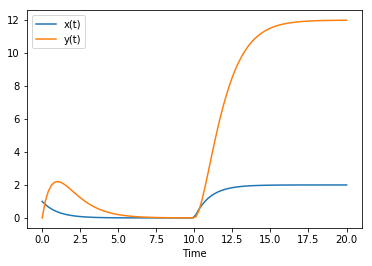

In [66]:
def model6(Y,t):
    if t<10:
        u = 0
    else:
        u = 2
        
    x,y = Y
    dYdt = [-x+u,6*x-y]
    return dYdt

Y0 = [1,0]
t = np.linspace(0,20,100)

sol = odeint(model6,Y0,t)

plt.plot(t,sol[:,0], label='x(t)')
plt.plot(t,sol[:,1], label='y(t)')

plt.xlabel('Time')
plt.legend()

Text(0.5,1,'x(t) vs y(t)')

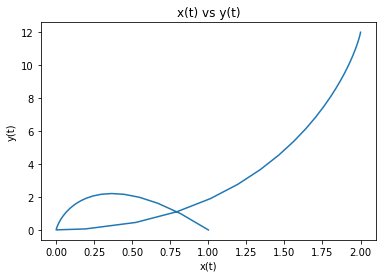

In [67]:
plt.plot(sol[:,0],sol[:,1])

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('x(t) vs y(t)')

### 2.3 The Pendulum Equation (Second order differential equations) <a name="Pend"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

The dynamics of pendulum motion are, in general, complicated and difficult to compute analytically without simplifying assumptions. 

<center> 45 Degree Start </center> | <center> 170 Degree Start </center> | <center> 190 Degree Start </center>
- | - | -
![45 Degree Start](https://upload.wikimedia.org/wikipedia/commons/c/c1/Pendulum_45deg.gif) | ![170 Degree Start](https://upload.wikimedia.org/wikipedia/commons/5/55/Pendulum_170deg.gif) | ![190 Degree Start](https://upload.wikimedia.org/wikipedia/commons/b/b7/Pendulum_190deg.gif)

However, numerical approximations in the short time range do a fairly good job of predicting the various oscillatory patterns traced out by pendulums given different initial starting conditions. With a bit of highschool trigonometry, we can write a second order differential equation relating the force on the pendulum to it's angle from the bottom of it's arc.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/24/Oscillating_pendulum.gif" alt="drawing" width="200px"/>

The second order differential equation for the angle $\theta(t)$ of a pendulum being acted on by a constant gravitational force is

$$
\theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0\,,
$$

where $b$ and $c$ are positive constants. To solve this with `odeint` we need to split it into a system of first order differential equations. Letting $\omega(t) = \theta'(t)$, we can rewrite the pendulum equation as
\begin{align}
\theta'(t) &= \omega(t)
\\
\omega'(t) &= - b\omega(t) - c\sin(\theta(t)) 
\end{align}

Solve the pendulum equation numerically. 

In [11]:
def pend(Y, t):
    b = 0.25
    c = 5.0
    th, om = Y
    dthdt = om
    domdt = -b*om-c*np.sin(th)
    
    return [dthdt,domdt]

Y0 = [np.pi/4, 0.0]

t = np.linspace(0,10, 1000)
sol = odeint(pend, Y0, t)

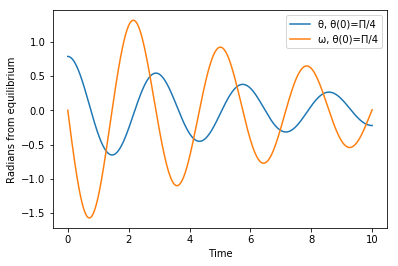

In [21]:
plt.plot(t,sol[:,0], label='θ, θ(0)=Π/4')
plt.plot(t,sol[:,1], label='ω, θ(0)=Π/4')

plt.xlabel('Time')
plt.ylabel('Radians from equilibrium')
plt.legend()

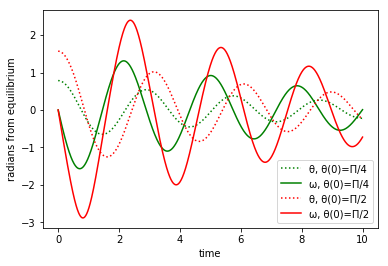

In [19]:
Y0 = [np.pi/2, 0.0]

t = np.linspace(0,10, 1000)
sol2 = odeint(pend, Y0, t)

plt.plot(t,sol[:,0],'g:',label='θ, θ(0)=Π/4')
plt.plot(t,sol[:,1],'g',label='ω, θ(0)=Π/4')
plt.plot(t,sol2[:,0],'r:',label='θ, θ(0)=Π/2')
plt.plot(t,sol2[:,1],'r',label='ω, θ(0)=Π/2')

plt.xlabel('Time')
plt.ylabel('Radians from equilibrium')
plt.legend()